In [1]:
class LogisticRegression(object):
    def __init__(self, eta=0.001, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w = np.ones(X.shape[1])

        for _ in range(self.n_iter):
            output = X.dot(self.w)
            errors = y - self.sigmoid(output)
            self.w += self.eta * errors.T.dot(X)
            # print(sum(errors**2) / 2.0)
        return self

    def predict(self, X):
        output = np.insert(X, 0, 1, axis=1).dot(self.w)
        return (self.sigmoid(output) + .5) / 1

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import datasets, linear_model

In [3]:
class LogisticRegressionOVR(object):
    """One vs Rest"""

    def __init__(self, eta=0.001, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w = []

        for i in np.unique(y):
            y_copy = [1 if c == i else 0 for c in y]
            w = np.ones(X.shape[1])

            # print('training ', i)
            # counter = 0

            for _ in range(self.n_iter):
                output = X.dot(w)
                errors = y_copy - self.sigmoid(output)
                w += self.eta * errors.T.dot(X)
                
                # counter += 1
                # if counter // 10 == 0:
                #     print(sum(errors**2) / 2.0)
            self.w.append((w, i))

        return self


    def predictOne(self, x):
        return max((x.dot(w), c) for w, c in self.w)[1]

    def predict(self, X):
        return np.array([self.predictOne(i) for i in np.insert(X, 0, 1, axis=1)])

    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [4]:
def main():
    iris = datasets.load_iris()
    # X = iris.data[:100, :2]
    # y = iris.target[:100]
    X = iris.data[:, :2]
    y = iris.target
    logi = LogisticRegression2()
    logi.fit(X, y)
    y_pred = logi.predict(X)
    print(y_pred)
    print("out of a total %d points : %d" % (X.shape[0],(y != y_pred).sum()))

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

# logreg = linear_model.LogisticRegression(C=1e5)
logreg = LogisticRegression(n_iter=1000)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# # we create an instance of Neighbours Classifier and fit the data.
# logreg.fit(X, Y)

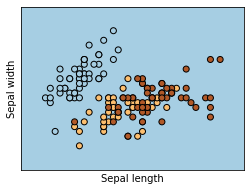

In [6]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [7]:
np.set_printoptions(precision=3)
iris = datasets.load_iris()
X = iris.data
y = iris.target
logi = LogisticRegressionOVR(n_iter=1000).fit(X, y)
print(logi.w)

[(array([ 1.137,  0.215,  2.268, -3.153, -0.799]), 0), (array([ 1.863,  0.578, -2.075,  0.595, -1.693]), 1), (array([-0.795, -2.6  , -2.171,  3.495,  3.724]), 2)]


In [8]:
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X_train, X_temp, y_train, y_temp = \
    train_test_split(iris.data, iris.target, test_size=.4)
X_validation, X_test, y_validation, y_test = \
    train_test_split(X_temp, y_temp, test_size=.5)

In [9]:
print(logi.score(X_train, y_train))
print(logi.score(X_validation, y_validation))

0.9777777777777777
0.9666666666666667


In [10]:
print(logi.predict(X_train))

[1 2 1 2 2 0 0 1 0 1 0 1 2 0 1 2 1 1 2 0 1 1 1 0 0 2 1 0 2 1 1 1 2 0 0 0 0
 0 2 0 1 1 0 2 2 1 0 1 2 1 0 1 0 0 1 1 2 2 1 1 2 0 2 2 0 2 0 2 0 2 0 1 0 0
 0 2 1 0 2 2 2 2 1 2 1 2 1 1 1 1]


In [11]:
np.set_printoptions(precision=3)
iris = datasets.load_iris()
X = iris.data
y = iris.target
logi = LogisticRegression(n_iter=1000).fit(X, y)
print(logi.predict(X))

[1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5]


In [12]:
print(logreg.fit(X, Y).w)
# print(logreg.w[1:])

[  1.   80.1 -21.7 205.5  90. ]


In [13]:
def logistic(x):
    return 1.0 / (1 + np.exp(-x))

In [14]:

def fit(X, y):
    X = np.insert(X, 0, 1, axis=1)
    w = np.ones(X.shape[1])
    m = X.shape[0]
    eta = 0.001

    for _ in range(50):
        output = X.dot(w)
        errors = y - sigmoid(output)
        w += eta / m * errors.dot(X)
    return w

def predict(X,w):
    output = np.insert(X, 0, 1, axis=1).dot(w)
    return (np.floor(sigmoid(output) + .5)).astype(int)

def score(X, y,w):
    return sum(predict(X,w) == y) / len(y)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
w = fit(X,Y)
w1 = predict(X,w)
w2 = score(X_train,y_train,w)
w2

0.3888888888888889

In [16]:
true_positives = false_positives = true_negatives = false_negatives = 0

for x_i, y_i in zip(X_train, y_train):
#     print(x_i)
    prediction = logistic(np.dot(w[1:], x_i))

    if y_i == 1 and prediction >= 0.5:  # TP: paid and we predict paid
        true_positives += 1
    elif y_i == 1:                      # FN: paid and we predict unpaid
        false_negatives += 1
    elif prediction >= 0.5:             # FP: unpaid and we predict paid
        false_positives += 1
    else:                               # TN: unpaid and we predict unpaid
        true_negatives += 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

true_positives

35

In [17]:
print(precision)
print(recall)

0.3888888888888889
1.0
